# **Building NLP Solutions with NGC Models and Containers on Google Cloud AI Platform**  
## **Table of Contents**
- [Repository](#repository)
- [Task](#task)
- [Assets](#assets)
- [Data](#data)
- [Setup](#setup)
- [Fine-tune](#fine-tune)
- [TensorRT Optimization](#tensorrt-optimization)
- [Predict](#predict)

## **Repository**

- [Demo Repository - https://github.com/sohn21c/gcp-ai-platform-ngc-examples](https://github.com/sohn21c/gcp-ai-platform-ngc-examples)  


## **Task**

#### Steps
1. Fine-tune BERT with SQuAD data set to create QA model
2. Optimize the model with NVIDIA TensorRT
3. Deploy the model with NVIDIA Triton Inference Server

#### Relevant Resources
1. [Cloud AI Platform](https://cloud.google.com/ai-platform)  
    - [Training - https://cloud.google.com/ai-platform/training/docs/overview](https://cloud.google.com/ai-platform/training/docs/overview)
    - [Prediction - https://cloud.google.com/ai-platform/prediction/docs](https://cloud.google.com/ai-platform/prediction/docs)
    - [Notebook - https://cloud.google.com/ai-platform-notebooks](https://cloud.google.com/ai-platform-notebooks)
2. [NGC](https://www.nvidia.com/en-us/gpu-cloud/)
    - [NGC Catalog - https://ngc.nvidia.com/catalog/all](https://ngc.nvidia.com/catalog/all](https://ngc.nvidia.com/catalog/all](https://ngc.nvidia.com/catalog/all)
<!-- <p>&nbsp;</p> -->


## **Assets**
#### BERT Resources
- [https://ngc.nvidia.com/catalog/resources/nvidia:bert_for_tensorflow](https://ngc.nvidia.com/catalog/resources/nvidia:bert_for_tensorflow)  

#### BERT Config / Vocab / Pretrained Checkpoint
- [https://ngc.nvidia.com/catalog/models/nvidia:bert_tf_ckpt_large_pretraining_amp_lamb](https://ngc.nvidia.com/catalog/models/nvidia:bert_tf_ckpt_large_pretraining_amp_lamb)

#### TensorRT
- [https://ngc.nvidia.com/catalog/containers/nvidia:tensorrt](https://ngc.nvidia.com/catalog/containers/nvidia:tensorrt)

#### Triton Inference Server 
- [https://ngc.nvidia.com/catalog/containers/nvidia:tritonserver](https://ngc.nvidia.com/catalog/containers/nvidia:tritonserver)

## **Data**
#### Stanford Question Answering Dataset(SQuAD)
- [https://rajpurkar.github.io/SQuAD-explorer/](https://rajpurkar.github.io/SQuAD-explorer/)

- SQuAD is a reading comprehension dataset.
    - **SQuAD 1.1**: 100,000+ question-answer pairs
    - **SQuAD 2.0**: SQuAD 1.1 + 50,000+ unanswerable questions 

#### Data Format
- JSON:
    - **qas**: question, answer, answer_start (index)
    - **context**

#### Example Question-Answer Pair
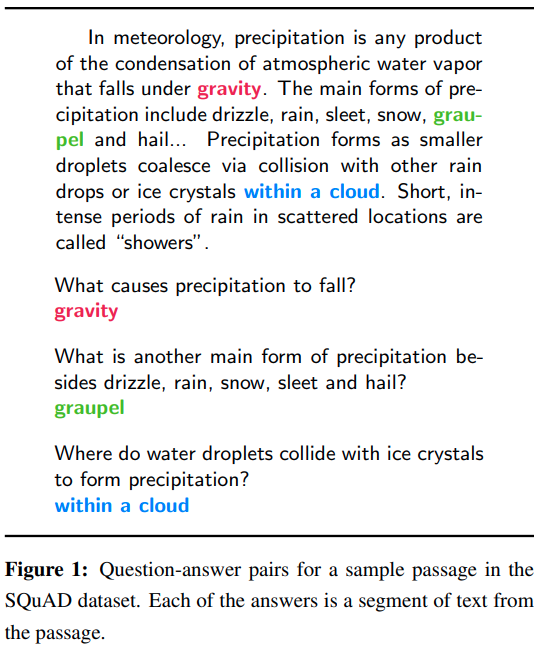

## **Setup**
#### Download And Save Data to Google Cloud Storage
- Web Browser
- Cloud Shell
    - Create GS bucket
        ```bash
        gsutil mb gs://gtc-demo
        ```  
    <p>&nbsp;</p>
    - Enable GCSFuse with Cloud Shell
        ```bash
        # Replace [BUCKET_NAME], [USER] and [FOLDER_NAME] with yours 
        gsutil mb gs://[BUCKET_NAME]/
        mkdir /home/[USER]/[FOLDER_NAME]
        chmod 777 /home/[USER]/[FOLDER_NAME]
        gcsfuse -o nonempty -file-mode=777 -dir-mode=777 --stat-cache-ttl 0 --type-cache-ttl 0 [BUCKET_NAME] /home/[USER
        ]/[FOLDER_NAME]
        ```  
    <p>&nbsp;</p>
    - Download SQuAD v1.1 dataset to GCS
        ```bash
        mkdir -p /home/[USER]/[FOLDER_NAME]/squad/v1.1
        cd /home/[USER]/[FOLDER_NAME]/squad/v1.1
        wget https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v1.1.json
        wget https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v1.1.json
        wget https://worksheets.codalab.org/rest/bundles/0xbcd57bee090b421c982906709c8c27e1/contents/blob/
        ```  
    <p>&nbsp;</p>
    - Download checkpoint and BERT files
        ```bash
        mkdir -p /home/[USER]/[FOLDER_NAME]/checkpoint
        cd /home/[USER]/[FOLDER_NAME]/checkpoint
        wget --content-disposition https://api.ngc.nvidia.com/v2/models/nvidia/bert_tf_ckpt_large_pretraining_amp_lamb/versions/19.03.0/zip -O bert_tf_files.zip

        unzip bert_tf_files.zip -d bert_tf_pretraining_lamb_16n_v1
        ```
    <p>&nbsp;</p>
    - Create {output, trt_deployment, trt_engine} dir
        ```bash
        mkdir -p /home/[USER]/[FOLDER_NAME]/{output, trt_deployment, trt_engine}
        ```

#### Storage Structure

```
├── checkpoint  
│     ├── bert_tf_pretraining_lamb_16n_v1      
├── output 
├── squad  
│     ├── v1.1  
│           ├──dev-v1.1.json  
│           ├──evaluate-v1.1.py 
│           ├──train-v1.1.json  
├── trt_deployment  
├── trt_engine  
```

## **Fine-tune**
#### Work Flow
1. Build the container in Cloud Shell
2. Push container to Google Cloud Registry
3. Submit Training Job (Fine-tune)

#### Resources
- [Fine-tuning](https://github.com/sohn21c/gcp-ai-platform-ngc-examples/tree/master/ngc_bert_finetuning)
- [BERT for TF @NGC](https://ngc.nvidia.com/catalog/resources/nvidia:bert_for_tensorflow)
- [Cloud AI Platform Training](https://cloud.google.com/ai-platform/training/docs/overview)

#### Cloud SDK
- [Cloud SDK Documentation](https://cloud.google.com/sdk/gcloud/reference/ai-platform)  

#### Submit Training Job

In [ ]:
import os
os.environ["FINE_TUNE_JOB_NAME"] = "bert_finetuning_demo"

In [ ]:
!gcloud ai-platform jobs submit training $FINE_TUNE_JOB_NAME \
    --master-image-uri gcr.io/k80-exploration/gtc_demo_bert:latest \
    --region us-central1 \
    --master-accelerator count=8,type=nvidia-tesla-v100 \
    --master-machine-type n1-highmem-96 \
    --scale-tier custom

In [ ]:
!gcloud ai-platform jobs describe $FINE_TUNE_JOB_NAME

## **TensorRT Optmization**  
#### [TensorRT](https://github.com/NVIDIA/TensorRT)
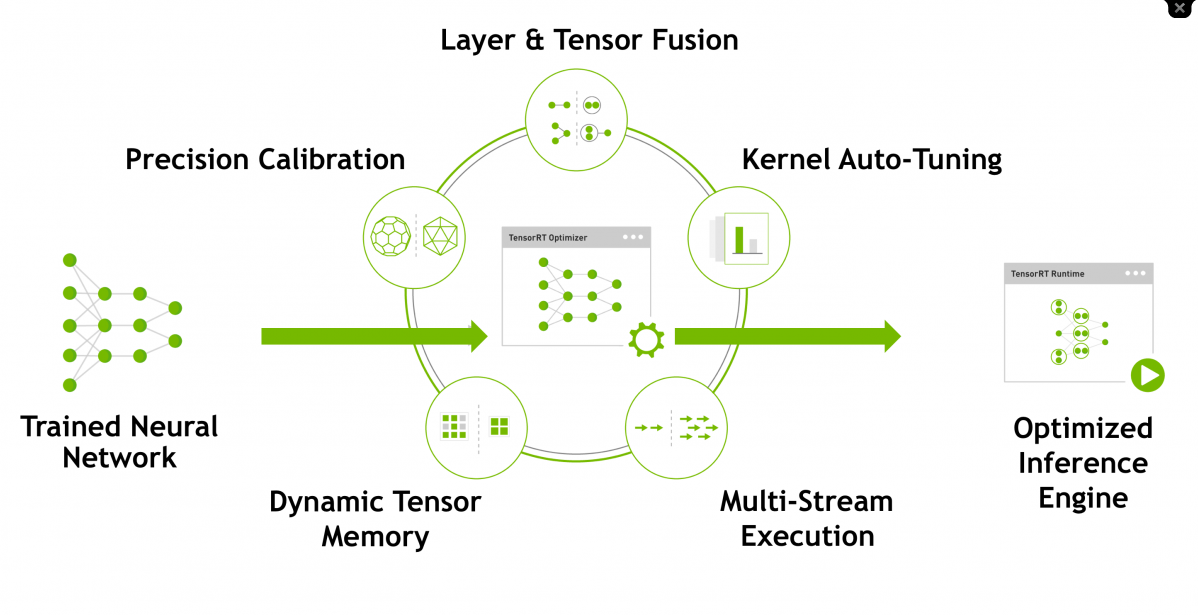  

#### Work Flow
1. Build the container in Cloud Shell
2. Push container to Google Cloud Container Registry
3. Submit Training Job (Optimization)

#### Resources
- [TensorRT Optimization](https://github.com/sohn21c/gcp-ai-platform-ngc-examples/tree/master/ngc_trt_optimization)
- [TensorRT](https://ngc.nvidia.com/catalog/containers/nvidia:tensorrt)

#### Submit Optimization Job

In [ ]:
import os
os.environ["TRT_JOB_NAME"] = "bert_trt_demo_00" 

In [ ]:
!gcloud ai-platform jobs submit training $TRT_JOB_NAME \
    --master-image-uri gcr.io/k80-exploration/gtc_demo_trt_bert:latest \
    --region us-central1 \
    --master-accelerator count=1,type=nvidia-tesla-t4 \
    --master-machine-type n1-highmem-8 \
    --scale-tier custom

In [ ]:
!gcloud ai-platform jobs describe $TRT_JOB_NAME

#### Move TRT Engine to Triton Model Repo

In [ ]:
!gsutil cp gs://gtc-bert-demo/bert/trt_engine/bert_large_384_int8.engine gs://gtc-bert-demo/bert/trt_deployment/bert/1/model.plan 

## **Prediction**

#### NVIDIA Triton Inference Server
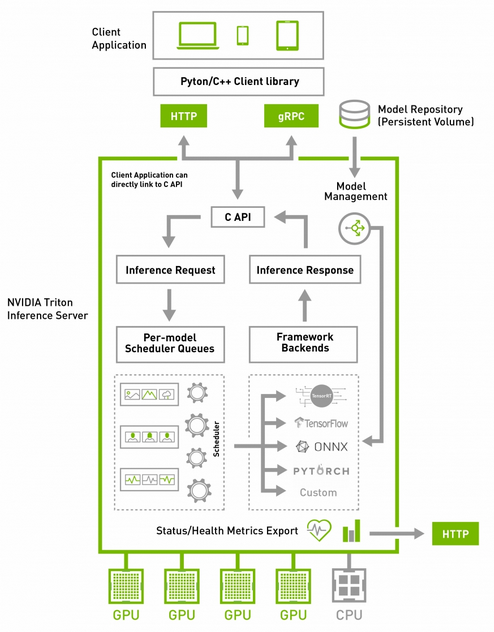  

#### Work Flow
1. Build the container in Cloud Shell
2. Push Triton container to Google Cloud Container Registry
3. Create Model
4. Create Model Version
5. Pre-process context/question for inference
6. Submit Prediction Job
7. Post-process response from Triton 

#### CMD
```bash
export CAIP_IMAGE=gcr.io/k80-exploration/tritonserver:20.08-py3
docker pull nvcr.io/nvidia/tritonserver:20.08-py3
docker tag nvcr.io/nvidia/tritonserver:20.08-py3 ${CAIP_IMAGE}
docker push ${CAIP_IMAGE}
```

#### Resources
- [Triton Deployment](https://github.com/sohn21c/gcp-ai-platform-ngc-examples/tree/master/ngc_triton_bert_deployment)
- [Triton Inference Server](https://ngc.nvidia.com/catalog/containers/nvidia:tritonserver)
- [Prediction Overview](https://cloud.google.com/ai-platform/prediction/docs/overview)



In [ ]:
%env PROJECT_ID=k80-exploration
%env MODEL_GCS_PATH=gs://gtc-bert-demo/bert/trt_deployment
%env ENDPOINT=https://alpha-ml.googleapis.com/v1

#### Create Model
AI Platform Prediction uses a **Model / Model Version** Hierarchy, where the Model is a logical grouping of Model Versions.  We will first create the Model.  
Because the MODEL_NAME variable will be used later to specify the predict route, and Triton will use that route to run prediction on a specific model, we must set the value of this variable to a valid name of a model. 

In [ ]:
%env MODEL_NAME=bert

In [ ]:
!curl -X \
    POST -k -H "Content-Type: application/json" \
    -d "{'name': '"$MODEL_NAME"'}" \
    -H "Authorization: Bearer `gcloud auth print-access-token`" \
    "${ENDPOINT}/projects/${PROJECT_ID}/models/"

_gcloud equivalent*_  
  
```bash
gcloud ai-platform models create $MODEL_NAME --region us-central1
```

#### Create Model Version
After the Model is created, we can now create a Model Version under this Model.  Each Model Version will need a name that is unique within the Model.  In AI Platform Prediction Custom Container, a `{Project}/{Model}/{ModelVersion}` uniquely identifies the specific container and model artifact used for inference.

In [ ]:
%env VERSION_NAME=demo02
%env TRITON_MODEL_NAME=bert

In [ ]:
import json
import os

triton_bert_version = {
  "name": os.getenv("VERSION_NAME"),
  "deployment_uri": os.getenv("MODEL_GCS_PATH"),
  "container": {
    "image": "gcr.io/"+os.getenv("PROJECT_ID")+"/tritonserver:20.08-py3",
    "args": ["tritonserver",
             "--model-repository=$(AIP_STORAGE_URI)",
             "--strict-model-config=false"
    ],
    "env": [
    ], 
    "ports": [
      { "containerPort": 8000 }
    ]
  },
  "routes": {
    "predict": "/v2/models/"+os.getenv("TRITON_MODEL_NAME")+"/infer",
    "health": "/v2/models/"+os.getenv("TRITON_MODEL_NAME")
  },
  "machine_type": "n1-standard-4",
  "acceleratorConfig": {
    "count":1,
    "type":"nvidia-tesla-t4"
  },
  "autoScaling": {
    "minNodes": 1
  }
}

with open("triton_bert_version.json", "w") as f: 
  json.dump(triton_bert_version, f)

In [ ]:
!curl -X \
    POST -k -H "Content-Type: application/json" \
    -d @triton_bert_version.json \
    -H "Authorization: Bearer `gcloud auth print-access-token`" \
    "${ENDPOINT}/projects/${PROJECT_ID}/models/${MODEL_NAME}/versions"

_gcloud equivalent*_  
```python
import yaml

config_simple={'deploymentUri': os.getenv("MODEL_GCS_PATH"), \
               'container': {'image': "gcr.io/"+os.getenv("PROJECT_ID")+"/tritonserver:20.08-py3", \
                             'args': ['tritonserver', 
                                      '--model-repository=$(AIP_STORAGE_URI)',
                                      '--strict-model-config=false'], \
                             'env': [], \
                             'ports': {'containerPort': 8000}}, \
               'routes': {'predict': '/v2/models/'+os.getenv("TRITON_MODEL_NAME")+'/infer', \
                          'health': '/v2/models/'+os.getenv("TRITON_MODEL_NAME")}, \
               'machineType': 'n1-standard-4', 'autoScaling': {'minNodes': 1}}

with open(r'triton_bert_version.yaml', 'w') as file:
    config = yaml.dump(config_simple, file)
```    
```bash
gcloud ai-platform versions create $VERSION_NAME \
--model $MODEL_NAME \
--accelerator count=1,type=nvidia-tesla-t4 \
--config triton_bert_version.yaml
```

#### Check the status of Model Version creation
Creating a Model Version may take several minutes.  You can check on the status of this specfic Model Version with the following, and a successful deployment will show:  
  
`"state": "READY"`

In [ ]:
!curl -X GET -k -H "Content-Type: application/json" \
    -H "Authorization: Bearer `gcloud auth print-access-token`" \
    "${ENDPOINT}/projects/${PROJECT_ID}/models/${MODEL_NAME}/versions/${VERSION_NAME}" 

_gcloud equivalent*_  
```bash
gcloud ai-platform versions describe $VERSION_NAME --model=$MODEL_NAME
```

#### List all Model Versions and their status 

In [ ]:
!curl -X GET -k -H "Content-Type: application/json" \
    -H "Authorization: Bearer `gcloud auth print-access-token`" \
    "${ENDPOINT}/projects/${PROJECT_ID}/models/${MODEL_NAME}/versions/" 

_gcloud equivalent*_  
```bash
gcloud ai-platform versions list --model=$MODEL_NAME
```

#### Pre-process

In [1]:
from run_squad import get_predictions, RawResult
from urllib.parse import quote
from utils.create_squad_data import read_squad_examples, convert_examples_to_features
from utils.caip_predict import *

import json
import modeling
import numpy as np
import os  
import tokenization 

In [2]:
title = "Project Apollo"

context = "The Apollo program, also known as Project Apollo, was the third United States human spaceflight program carried out by the National Aeronautics and Space Administration (NASA), which accomplished landing the first humans on the Moon from 1969 to 1972. First conceived during Dwight D. Eisenhower's administration as a three-man spacecraft to follow the one-man Project Mercury which put the first Americans in space, Apollo was later dedicated to President John F. Kennedy's national goal of landing a man on the Moon and returning him safely to the Earth by the end of the 1960s, which he proposed in a May 25, 1961, address to Congress. Project Mercury was followed by the two-man Project Gemini. The first manned flight of Apollo was in 1968. Apollo ran from 1961 to 1972, and was supported by the two man Gemini program which ran concurrently with it from 1962 to 1966. Gemini missions developed some of the space travel techniques that were necessary for the success of the Apollo missions. Apollo used Saturn family rockets as launch vehicles. Apollo/Saturn vehicles were also used for an Apollo Applications Program, which consisted of Skylab, a space station that supported three manned missions in 1973-74, and the Apollo-Soyuz Test Project, a joint Earth orbit mission with the Soviet Union in 1975."

question = "What project put the first Americans into space?"

body = {
    "data": [
        {"title": title, 
         "paragraphs": [
             {"context": context, 
              "qas": [
                  { "question": question, 
                   "id": "Q1"}
              ]}
         ]}
    ]}

vocab_file = 'vocab.txt'

print(json.dumps(body, indent=2))

{
  "data": [
    {
      "title": "Project Apollo",
      "paragraphs": [
        {
          "context": "The Apollo program, also known as Project Apollo, was the third United States human spaceflight program carried out by the National Aeronautics and Space Administration (NASA), which accomplished landing the first humans on the Moon from 1969 to 1972. First conceived during Dwight D. Eisenhower's administration as a three-man spacecraft to follow the one-man Project Mercury which put the first Americans in space, Apollo was later dedicated to President John F. Kennedy's national goal of landing a man on the Moon and returning him safely to the Earth by the end of the 1960s, which he proposed in a May 25, 1961, address to Congress. Project Mercury was followed by the two-man Project Gemini. The first manned flight of Apollo was in 1968. Apollo ran from 1961 to 1972, and was supported by the two man Gemini program which ran concurrently with it from 1962 to 1966. Gemini missions dev

In [3]:
title = "TensorRT"

context = "TensorRT is a high performance deep learning inference platform that delivers low latency and high throughput for apps such as recommenders, speech and image/video on NVIDIA GPUs. It includes parsers to import models, and plugins to support novel ops and layers before applying optimizations for inference. Today NVIDIA is open-sourcing parsers and plugins in TensorRT so that the deep learning community can customize and extend these components to take advantage of powerful TensorRT optimizations for your apps."

question = "What is TensorRT?"

body = {
    "data": [
        {"title": title, 
         "paragraphs": [
             {"context": context, 
              "qas": [
                  { "question": question, 
                   "id": "Q1"}
              ]}
         ]}
    ]}

vocab_file = 'vocab.txt'

print(json.dumps(body, indent=2))

{
  "data": [
    {
      "title": "TensorRT",
      "paragraphs": [
        {
          "context": "TensorRT is a high performance deep learning inference platform that delivers low latency and high throughput for apps such as recommenders, speech and image/video on NVIDIA GPUs. It includes parsers to import models, and plugins to support novel ops and layers before applying optimizations for inference. Today NVIDIA is open-sourcing parsers and plugins in TensorRT so that the deep learning community can customize and extend these components to take advantage of powerful TensorRT optimizations for your apps.",
          "qas": [
            {
              "question": "What is TensorRT?",
              "id": "Q1"
            }
          ]
        }
      ]
    }
  ]
}


In [4]:
def init_bert_config():
    """
    Defines the configuration of BERT model
    """
    global do_lower_case 
    global predict_batch_size
    global max_seq_length
    global doc_stride 
    global max_query_length 
    global verbose_logging 
    global version_2_with_negative 
    global n_best_size
    global max_answer_length

    # Set True for uncased model
    do_lower_case = True

    # Total batch size for predictions
    predict_batch_size = 1

    # The maximum total input sequence length after WordPiece tokenization. 
    # Sequences longer than this will be truncated, and sequences shorter than this will be padded.
    max_seq_length = 384

    # When splitting up a long document into chunks, how much stride to take between chunks.
    doc_stride = 128

    # The maximum number of tokens for the question. 
    # Questions longer than this will be truncated to this length.
    max_query_length = 64

    # Set True for verbosity
    verbose_logging = True

    # Set True if the dataset has samples with no answers. For SQuAD 1.1, this is set to False
    version_2_with_negative = False

    # The total number of n-best predictions to generate in the nbest_predictions.json output file.
    n_best_size = 20

    # The maximum length of an answer that can be generated. 
    # This is needed  because the start and end predictions are not conditioned on one another.
    max_answer_length = 30

    return

init_bert_config()

In [5]:
tokenizer = tokenization.FullTokenizer(vocab_file=vocab_file, do_lower_case=do_lower_case)

input_data = body['data']

eval_examples = read_squad_examples(input_file=None, is_training=False, version_2_with_negative=version_2_with_negative, input_data=input_data)
eval_features = []
def append_feature(feature):
    eval_features.append(feature)    
convert_examples_to_features(
    examples=eval_examples[0:],
    tokenizer=tokenizer,
    max_seq_length=max_seq_length,
    doc_stride=doc_stride,
    max_query_length=max_query_length,
    is_training=False,
    output_fn=append_feature)

inputs_dict = batch(eval_features)
label_ids_data = np.stack(inputs_dict['unique_ids'])
input_ids_data = np.stack(inputs_dict['input_ids'])
input_mask_data = np.stack(inputs_dict['input_mask'])
segment_ids_data = np.stack(inputs_dict['segment_ids'])

inputs = []
inputs.append(InferInput('input_ids', input_ids_data.shape, "INT32"))
inputs[0].set_data_from_numpy(input_ids_data, binary_data=False)
inputs.append(InferInput('input_mask', input_mask_data.shape, "INT32"))
inputs[1].set_data_from_numpy(input_mask_data, binary_data=False)
inputs.append(InferInput('segment_ids', segment_ids_data.shape, "INT32"))
inputs[2].set_data_from_numpy(segment_ids_data, binary_data=False)

outputs = []
outputs.append(InferRequestedOutput('cls_squad_logits', binary_data=False))

#### Submit Prediction Job

In [6]:
def get_trt_inference_request(inputs):
    infer_request = {"inputs":[]}
    temp = {
        "name": "",
        "shape": None,
        "datatype": "",
        "parameters": {},
        "data": None
    }
    for inp in inputs:
        arg_obj = temp.copy()
        arg_obj["name"] = inp._name
        arg_obj["shape"] = list(inp._shape)
        arg_obj["datatype"] = inp._datatype
        arg_obj["data"] = inp._data
        infer_request["inputs"].append(arg_obj)
    return infer_request

request_body = get_trt_inference_request(inputs)

with open('payload.dat', 'w') as output_file:
    json.dump(request_body, output_file)

In [7]:
%env VERSION_NAME=demo01

env: VERSION_NAME=demo01


In [8]:
import json

In [11]:
!curl -X POST $ENDPOINT/projects/$PROJECT_ID/models/$MODEL_NAME/versions/$VERSION_NAME:predict \
    -k -H "Content-Type: application/json" \
    -H "Authorization: Bearer `gcloud auth print-access-token`" \
    -d @payload.dat \
    -o response.txt

curl: (3) URL using bad/illegal format or missing URL


#### Post-Process

In [16]:
with open('response.txt', 'r') as response_file:
    response = response_file.read()
response_body = json.loads(response)
response_data = response_body['outputs'][0]['data']
print(response_body)

{'model_name': 'bert', 'model_version': '1', 'outputs': [{'name': 'cls_squad_logits', 'datatype': 'FP32', 'shape': [1, 384, 2, 1, 1], 'data': [-7.671875, -8.234375, -7.16796875, -8.125, -7.640625, -8.21875, -7.3359375, -8.46875, -7.96875, -7.79296875, -7.99609375, -8.2890625, -7.421875, -8.015625, -1.8076171875, -7.16015625, -5.1640625, -6.62109375, -1.0546875, -6.546875, 3.3515625, -3.7578125, 2.845703125, -3.408203125, -1.36328125, -2.96875, 1.5966796875, -2.251953125, -0.810546875, -0.161865234375, -0.137451171875, 0.49951171875, -0.480712890625, 2.984375, -3.412109375, -4.46484375, -1.982421875, -4.171875, -0.8212890625, -4.66796875, -6.6953125, -8.296875, -5.1484375, -2.328125, -6.921875, -7.875, -3.9453125, -6.23828125, -6.35546875, -7.9375, -4.15234375, 1.80078125, -5.1875, -4.61328125, -2.60546875, 1.91796875, -7.55078125, -5.7734375, -7.87890625, -7.4609375, -4.5546875, -6.6484375, -6.58984375, -2.587890625, -7.69921875, -6.80078125, -4.89453125, -3.51953125, -7.7734375, -8.15

In [17]:
start_logits_results, end_logits_results = [], []
for ind, val in enumerate(response_data):
    if ind % 2 == 0:
        start_logits_results.append(val)
    else:
        end_logits_results.append(val)
        
all_results = []
unique_id = inputs_dict['unique_ids'][0][0]
start_logits = [float(x) for x in start_logits_results]
end_logits = [float(x) for x in end_logits_results]
all_results.append(
    RawResult(
        unique_id=unique_id,
        start_logits=start_logits,
        end_logits=end_logits)
)
all_predictions, all_nbest_json, scores_diff_json = get_predictions(
                  eval_examples, eval_features, all_results,
                  n_best_size, max_answer_length,
                  do_lower_case, version_2_with_negative,
                  verbose_logging)

#### Prediction Result


In [ ]:
print('Context: ')
print(f'\t{context}')
print()
print('Question: ')
print(f'\t{question}')

In [ ]:
print('Prediction: ')
print('\t',all_predictions['Q1'])

#### Clean up

In [ ]:
# remove model version
!curl --request DELETE -k -H "Content-Type: application/json" \
    -H "Authorization: Bearer `gcloud auth print-access-token`" \
    "${ENDPOINT}/projects/${PROJECT_ID}/models/${MODEL_NAME}/versions/${VERSION_NAME}"

_gcloud equivalent*_  
```bash
gcloud ai-platform versions delete $VERSION_NAME --model=$MODEL_NAME --quiet
```

In [ ]:
# remove model 
!curl --request DELETE -k -H "Content-Type: application/json" \
    -H "Authorization: Bearer `gcloud auth print-access-token`" \
    "${ENDPOINT}/projects/${PROJECT_ID}/models/${MODEL_NAME}"

_gcloud equivalent*_  
```bash
gcloud ai-platform models delete $MODEL_NAME --quiet
```
